Задачи:
* очистка таблицы от некорректных данных и пропусков

* разработка базовой модели классификации

* модификация решения и поиск наилучшей конфигурации модели **ID3** 

In [2]:
import pandas as pd
df = pd.read_csv("chickenpox.csv", index_col = 0)

In [3]:
df

,Возраст,Пол,Рост_см,Родители_болели_ветрянкой,Домашний_питомец,Ветрянка
id,,,,,,
0.0,19,ж,184,да,нет,нет
1.0,25,м,166,да,нет,нет
2.0,12,ж,115,нет,да,нет
3.0,6,м,85,да,да,нет
4.0,2,м,116,нет,да,да
...,...,...,...,...,...,...
995.0,6,м,92,нет,да,да
996.0,5,м,121,да,да,да
997.0,20,ж,158,да,да,нет


### Признаки предикторы

* **Возраст**
* **Рост_см**
* **Пол**
* **Родители_болели_ветрянкой**
* **Домашний_питомец**

### Целевой признак

* **Ветрянка**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0.0 to 999.0
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Возраст                    999 non-null    int64 
 1   Пол                        992 non-null    object
 2   Рост_см                    999 non-null    int64 
 3   Родители_болели_ветрянкой  999 non-null    object
 4   Домашний_питомец           990 non-null    object
 5   Ветрянка                   999 non-null    object
dtypes: int64(2), object(4)
memory usage: 54.6+ KB


In [5]:
df[df['Пол'].isna()]

,Возраст,Пол,Рост_см,Родители_болели_ветрянкой,Домашний_питомец,Ветрянка
id,,,,,,
109.0,22,NaN,188,нет,да,да
146.0,29,NaN,188,да,да,нет
176.0,12,NaN,175,нет,нет,нет
208.0,31,NaN,185,нет,да,да
213.0,7,NaN,179,нет,да,нет
638.0,45,NaN,118,нет,да,нет
796.0,16,NaN,130,нет,да,нет


In [6]:
df = df.drop(df[df['Пол'].isna()].index, axis = 0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0.0 to 999.0
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Возраст                    992 non-null    int64 
 1   Пол                        992 non-null    object
 2   Рост_см                    992 non-null    int64 
 3   Родители_болели_ветрянкой  992 non-null    object
 4   Домашний_питомец           983 non-null    object
 5   Ветрянка                   992 non-null    object
dtypes: int64(2), object(4)
memory usage: 54.2+ KB


In [8]:
df[df['Домашний_питомец'].isna()]

,Возраст,Пол,Рост_см,Родители_болели_ветрянкой,Домашний_питомец,Ветрянка
id,,,,,,
51.0,5,м,147,нет,NaN,нет
74.0,13,м,192,нет,NaN,да
380.0,9,ж,107,нет,NaN,да
574.0,4,ж,122,нет,NaN,да
683.0,48,м,199,нет,NaN,нет
694.0,24,ж,95,да,NaN,нет
739.0,20,ж,162,нет,NaN,нет
763.0,32,м,147,нет,NaN,да
961.0,5,м,98,нет,NaN,да


In [9]:
df = df.drop(df[df['Домашний_питомец'].isna()].index, axis = 0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0.0 to 999.0
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Возраст                    983 non-null    int64 
 1   Пол                        983 non-null    object
 2   Рост_см                    983 non-null    int64 
 3   Родители_болели_ветрянкой  983 non-null    object
 4   Домашний_питомец           983 non-null    object
 5   Ветрянка                   983 non-null    object
dtypes: int64(2), object(4)
memory usage: 53.8+ KB


In [11]:
df

,Возраст,Пол,Рост_см,Родители_болели_ветрянкой,Домашний_питомец,Ветрянка
id,,,,,,
0.0,19,ж,184,да,нет,нет
1.0,25,м,166,да,нет,нет
2.0,12,ж,115,нет,да,нет
3.0,6,м,85,да,да,нет
4.0,2,м,116,нет,да,да
...,...,...,...,...,...,...
995.0,6,м,92,нет,да,да
996.0,5,м,121,да,да,да
997.0,20,ж,158,да,да,нет


In [12]:
df.describe()

,Возраст,Рост_см
count,983.000000,983.000000
mean,19.174975,148.144456
std,38.322911,88.526288
min,1.000000,80.000000
25%,7.000000,104.000000
50%,15.000000,140.000000
75%,21.000000,174.000000
max,395.000000,994.000000


In [13]:
df = df.drop(df[df['Возраст'] > 100].index, axis = 0)
df.describe()

,Возраст,Рост_см
count,964.000000,964.000000
mean,14.005187,148.233402
std,8.107595,89.246276
min,1.000000,80.000000
25%,7.000000,104.000000
50%,12.000000,140.000000
75%,21.000000,174.000000
max,48.000000,994.000000


In [14]:
df = df.drop(df[df['Рост_см'] > 200].index, axis = 0)
df.describe()

,Возраст,Рост_см
count,948.000000,948.000000
mean,13.797468,138.227848
std,7.810528,37.315216
min,1.000000,80.000000
25%,7.000000,104.000000
50%,12.000000,137.000000
75%,21.000000,173.250000
max,25.000000,199.000000


In [15]:
df['Пол'] = df['Пол'].map({'ж' : 0,'м' : 1})
df['Родители_болели_ветрянкой'] = df['Родители_болели_ветрянкой'].map({'нет' : 0,'да' : 1})
df['Домашний_питомец'] = df['Домашний_питомец'].map({'нет' : 0,'да' : 1})
df['Ветрянка'] = df['Ветрянка'].map({'нет' : 0,'да' : 1})
df

,Возраст,Пол,Рост_см,Родители_болели_ветрянкой,Домашний_питомец,Ветрянка
id,,,,,,
0.0,19,0,184,1,0,0
1.0,25,1,166,1,0,0
2.0,12,0,115,0,1,0
3.0,6,1,85,1,1,0
4.0,2,1,116,0,1,1
...,...,...,...,...,...,...
995.0,6,1,92,0,1,1
996.0,5,1,121,1,1,1
997.0,20,0,158,1,1,0


In [16]:
df.describe()

,Возраст,Пол,Рост_см,Родители_болели_ветрянкой,Домашний_питомец,Ветрянка
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,13.797468,0.491561,138.227848,0.487342,0.505274,0.497890
std,7.810528,0.500193,37.315216,0.500104,0.500236,0.500259
min,1.000000,0.000000,80.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,104.000000,0.000000,0.000000,0.000000
50%,12.000000,0.000000,137.000000,0.000000,1.000000,0.000000
75%,21.000000,1.000000,173.250000,1.000000,1.000000,1.000000
max,25.000000,1.000000,199.000000,1.000000,1.000000,1.000000


In [17]:
len_df = len(df)
len_df

948

In [18]:
df_train = df.iloc[0 : int(0.9*len_df)]
df_val = df.iloc[int(0.9*len_df):]

In [19]:
predictors_cols = df_train.drop(['Ветрянка'], axis=1).columns
answer_col = 'Ветрянка'

In [20]:
X_train = df_train[predictors_cols]
y_train = df_train[answer_col]

X_val = df_val[predictors_cols]
y_val = df_val[answer_col]

In [21]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=5, random_state=0)
clf = clf.fit(X_train, y_train)

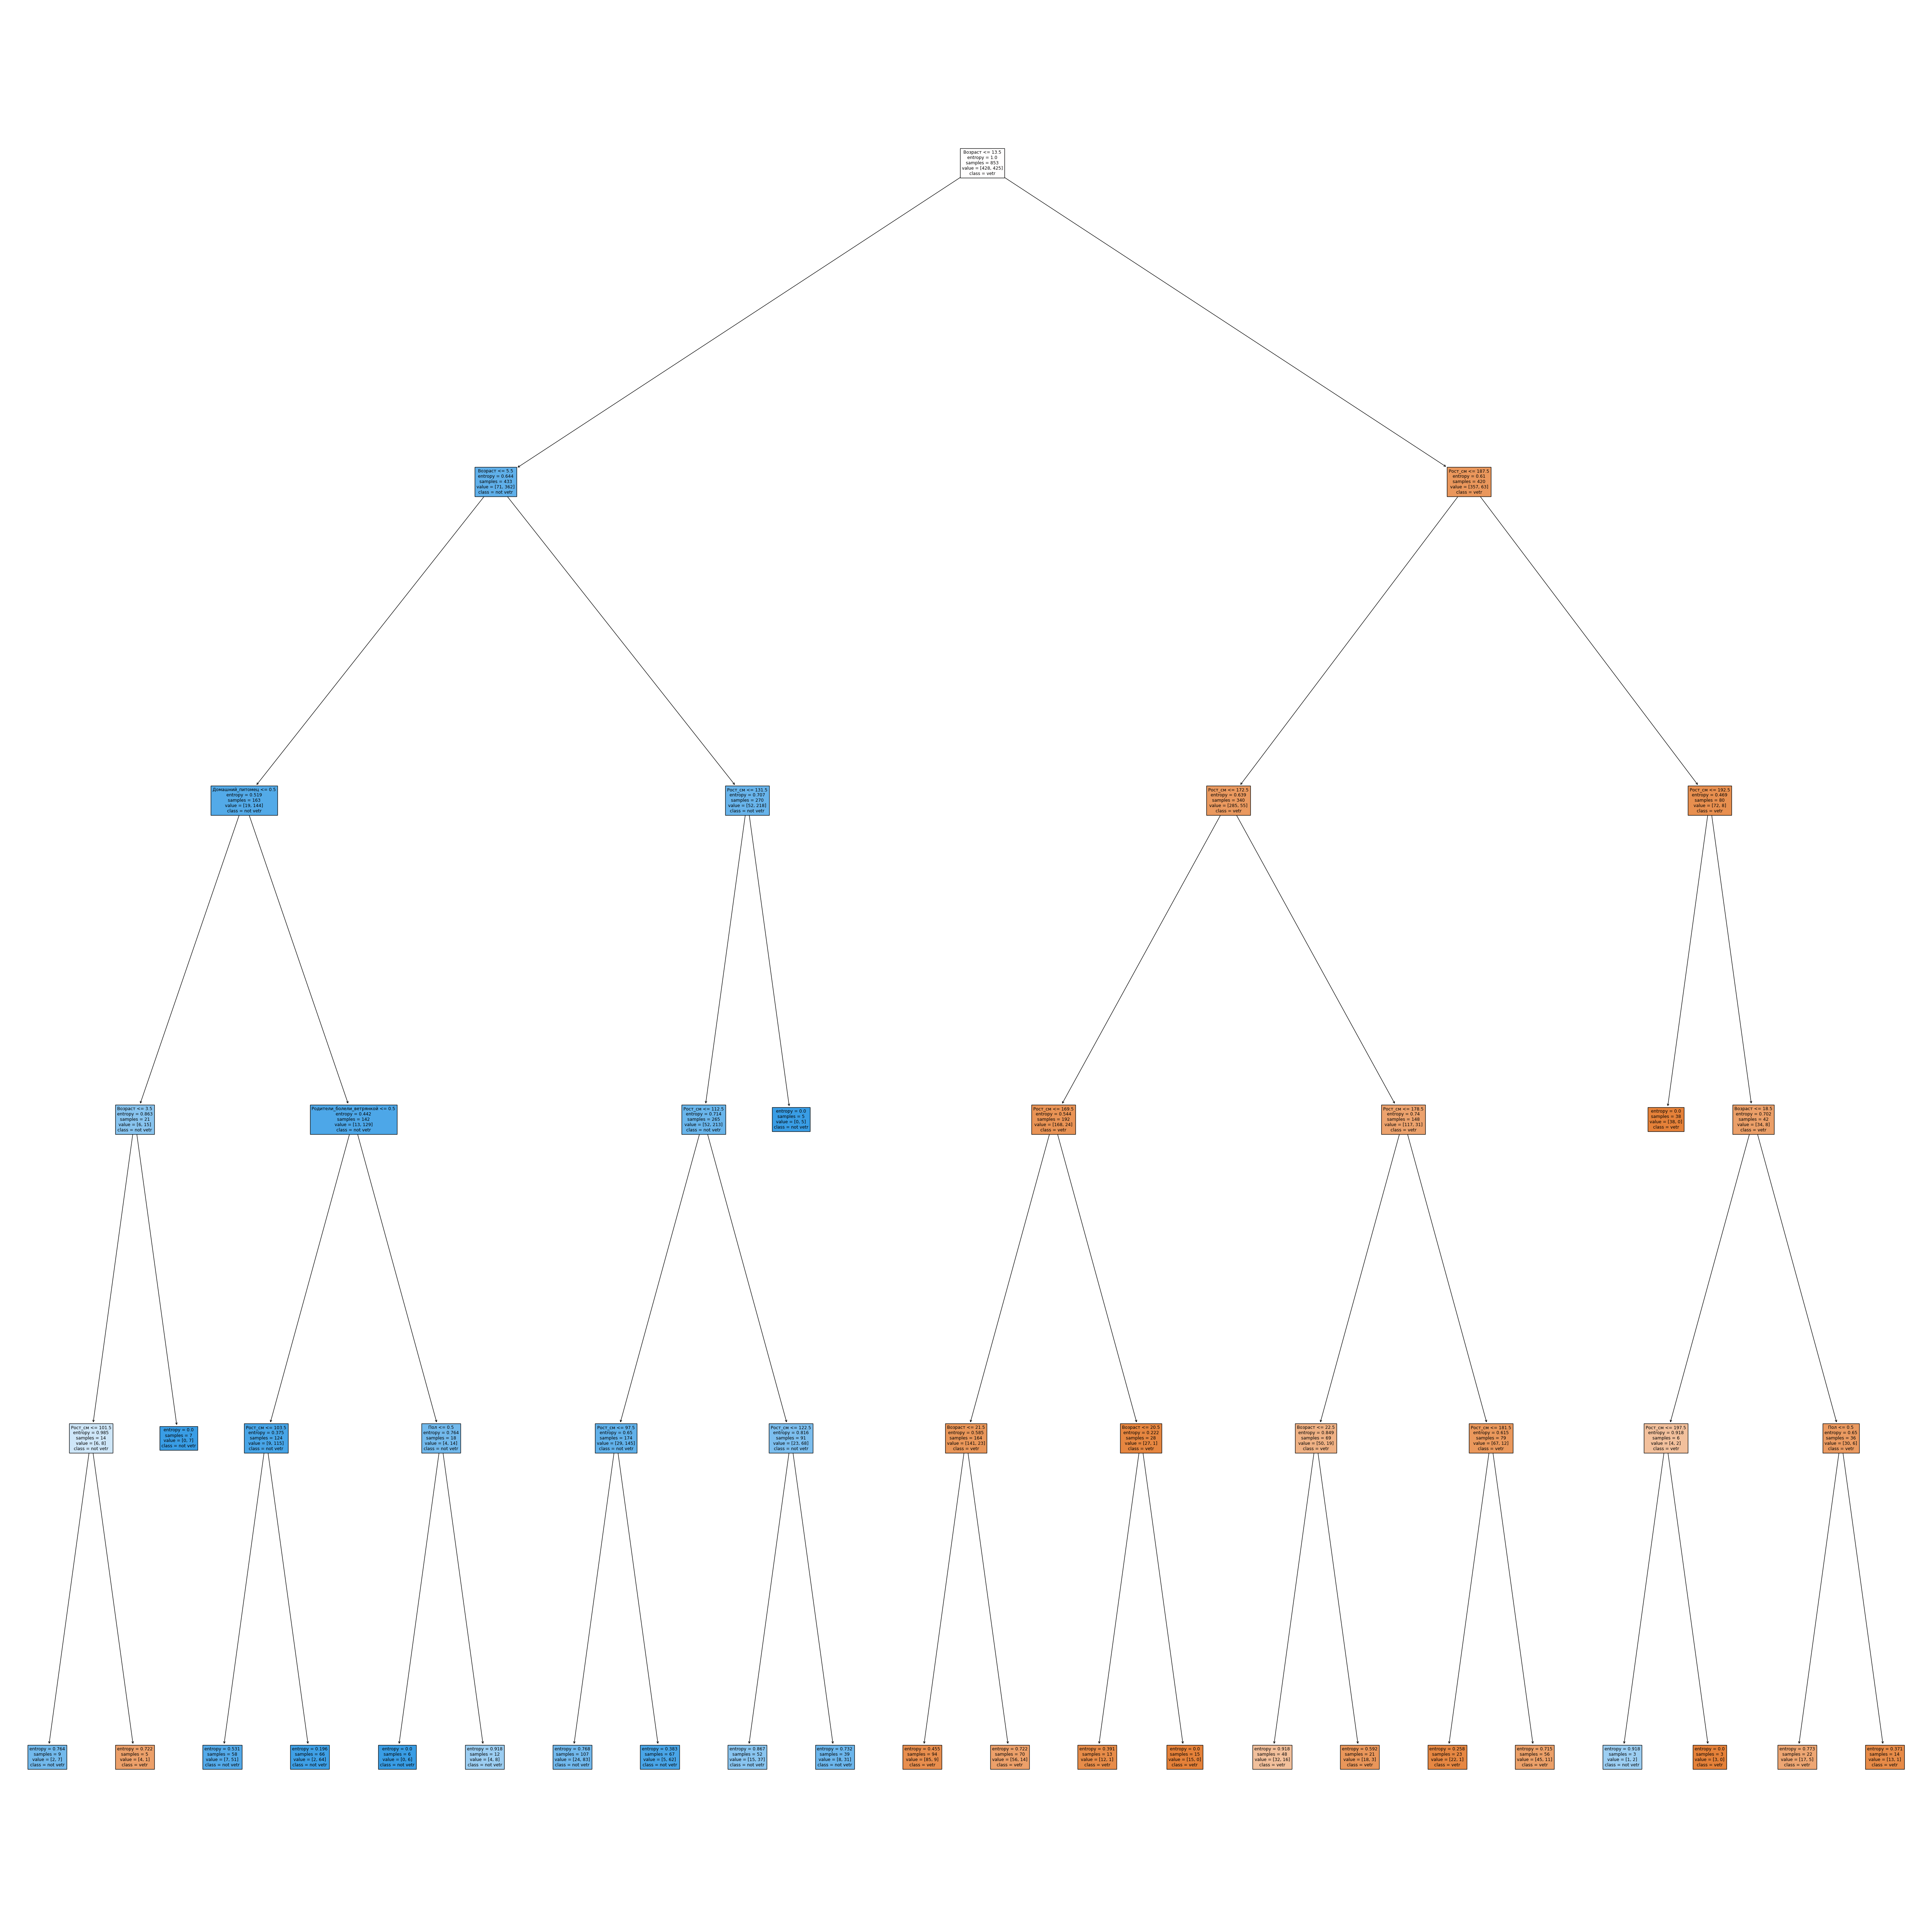

In [22]:
import matplotlib.pyplot as plt # библиотека для красивой визуализации изображений
plt.figure(figsize=(70,70))
tree.plot_tree(clf, feature_names=list(predictors_cols),  
                   class_names=['vetr','not vetr'],
                   filled=True)
plt.show()

In [23]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state=0)
clf = clf.fit(X_train, y_train)

In [24]:
from sklearn.metrics import f1_score
predict = clf.predict(X_val)
f1_score(y_val, predict)

0.7291666666666666

In [25]:
def tree_fit_predict_f1(df_TRAIN, df_VAL, predictors_cols_names, answer_col_name, max_depths):
    
    X_train = df_TRAIN[predictors_cols_names]
    y_train = df_TRAIN[answer_col_name]
    
    X_val = df_VAL[predictors_cols_names]
    y_val = df_VAL[answer_col_name]
    
    clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=max_depth, random_state=0)
    clf = clf.fit(X_train, y_train)
    
    prediction = clf.predict(X_val)
    
    return f1_score(y_val, prediction)

In [31]:
max_depths = [3, 5, 9, 17, 20, len(df_train)]

for max_depth in max_depths:
    f1_k_metric = tree_fit_predict_f1(df_train, df_val, predictors_cols, answer_col, max_depth)
    print(f1_k_metric, max_depth)

0.875 3
0.8453608247422681 5
0.8125 9
0.7291666666666666 17
0.7291666666666666 20
0.7291666666666666 853


In [27]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=3, random_state=0)
clf = clf.fit(X_train, y_train)

In [28]:
predict = clf.predict(X_val)
f1_score(y_val, predict)

0.875

In [29]:
df_val['Prediction'] = predict

C:\Users\Сергей\AppData\Local\Temp\ipykernel_12132\1514996482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['Prediction'] = predict


In [30]:
df_val

,Возраст,Пол,Рост_см,Родители_болели_ветрянкой,Домашний_питомец,Ветрянка,Prediction
id,,,,,,,
901.0,21,0,158,1,0,0,0
902.0,11,1,123,0,1,1,1
903.0,4,0,136,0,0,0,1
905.0,23,0,162,1,0,0,0
906.0,15,0,197,0,0,0,0
...,...,...,...,...,...,...,...
995.0,6,1,92,0,1,1,1
996.0,5,1,121,1,1,1,1
997.0,20,0,158,1,1,0,0
